# Exploratory Data Analysis on Udemy Courses

#### Created by: Polin Tsenova

This notebook amis to explore Udemy Courses dataset taken from Kaggle repository. Exploratory Data Analysis is an aproach which summarize main characteristics of a dataset, often presenting the results visually. Based on the results further modeling of the data can be applied, which generate new insights to the user.

### Import Libriries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

### Import Data

In [2]:
data = pd.read_csv('udemy_courses.csv')

### Understand the data

In [3]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
data.shape

(3678, 12)

In [5]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
data.nunique()

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [8]:
data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [9]:
data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [10]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


The dataset contains 3678 records and 12 columns. Columns contain numeriacal and categorical data, but no missing values. The dataset contains information for courses from 4 different subjects groups in 4 different levels of education for more 2000 subscribers. The price interval range for a course is from 0 to 200, as the average price of a single course is 66.

### Data Cleaning

In [11]:
data.drop(['url'], inplace=True, axis=1)

In [12]:
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## Data Analysis and Visualisations

#### 1. What is the correlation between variables?

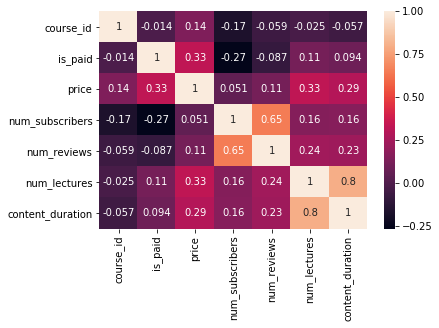

In [13]:
correlation = data.corr()
snb.heatmap(correlation, annot = True)
plt.show()

#### 2. What is the frequency distribution by course subject?

Text(0.5, 1.0, 'Frequency distribution by course subject')

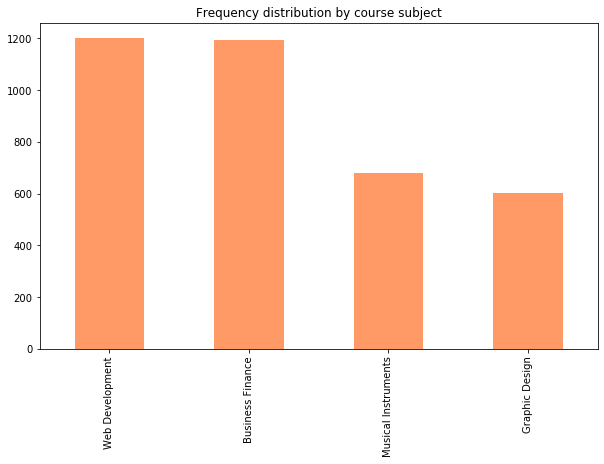

In [14]:
#calculate the frequency of courses by subject
subject_frequency = data['subject'].value_counts()
#visualize the results
subject_frequency.plot.bar(color='#FF9966', figsize=(10, 6))
plt.title("Frequency distribution by course subject")

#### 3. What is the avarage price of Web development course?

In [15]:
#filter dataset to contain only Web Development
web_development = data[data['subject'] == 'Web Development']
web_development.shape

(1200, 11)

In [16]:
#calculate the average price of Web Development course
average_price = web_development['price'].mean()
average_price

77.03333333333333

Average price of a Web Development course is 77. As the average price of a course is 66, it can be concluded that Web Development courses are 11 more expensive on average.

#### 4.How course level affects the followers?

In [17]:
level_subscribers = data[['level', 'num_subscribers']]
level_subscribers = level_subscribers.groupby(['level'], as_index=False).sum()
level_subscribers

,level,num_subscribers
0,All Levels,6915076
1,Beginner Level,4051843
2,Expert Level,50196
3,Intermediate Level,742005


From the result table can be concluded that the broader the scope of the course, the more preffered the course is. As the level of expertise goes up, the number of subscribers goes down.

#### 5. Which are the top 10 rated courses?

Text(0.5, 1.0, 'Top 10 rating courses')

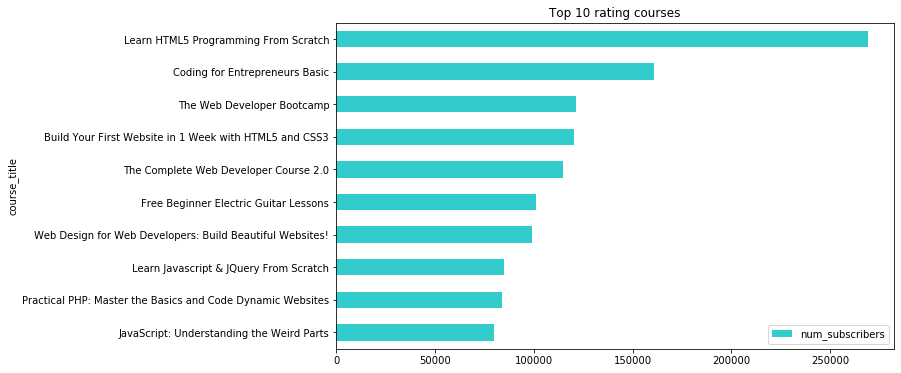

In [18]:
courses_review = data.loc[:, ['course_title', 'num_subscribers']]
courses_review.sort_values(by=['num_subscribers'], ascending=False,inplace=True)
top_10 = courses_review[:10]
top_10[::-1].plot.barh(x="course_title", color='#33cccc', figsize=(10, 6))
# top_10.plot(x="num_reviews", y='course_title', kind="bar")
plt.title("Top 10 rating courses")

#### 6. How content duration affects the price?

C:\Users\polin\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1974: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


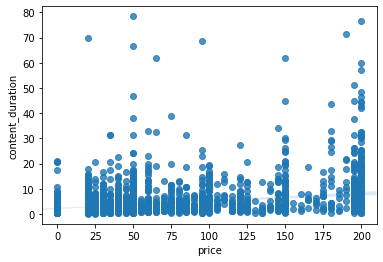

In [19]:
snb.regplot(x="price", y="content_duration", data=data)

From the above scatter plot can be concluded that there is a weak relationship between course duration and price

#### 7.What is the distribution of paid vs unpaid courses?

In [20]:
# prepare data column 
courses_charge=data['is_paid'].value_counts()
index_change = {True:'Paid',
                False: 'Unpaid'
                }
courses_charge = courses_charge.rename(index= index_change)
courses_charge

Paid      3368
Unpaid     310
Name: is_paid, dtype: int64

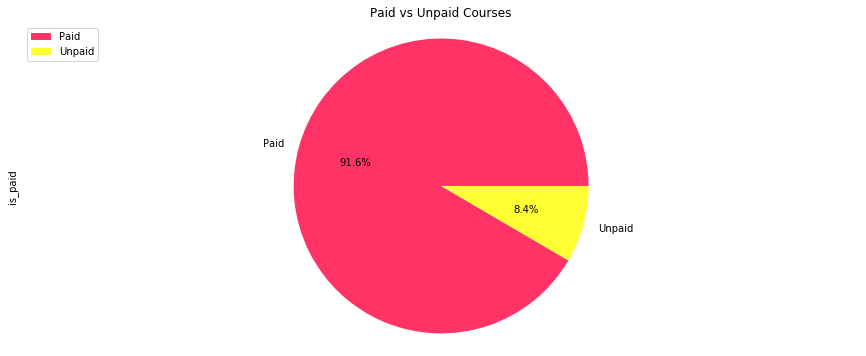

In [21]:
colors_list = ['#FF3366', '#FFFF33']

# plot the figure
courses_charge.plot(kind='pie',figsize=(15, 6), autopct='%1.1f%%', colors=colors_list)

# add title
plt.title('Paid vs Unpaid Courses') 

#figure placement
plt.axis('equal') 

# add legend
plt.legend(labels=['Paid','Unpaid'], loc='upper left') 

plt.show()

#### 8. What is the relationship between course duration and number of lectures?

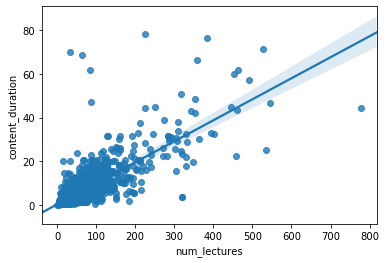

In [22]:
snb.regplot(x="num_lectures", y="content_duration", data=data)

There is a positive relationship between number of lectures and content duration.

#### 9.What is the distribution of course levels in Musical instruments?

Text(0.5, 1.0, 'Musical instruments distribution by course level')

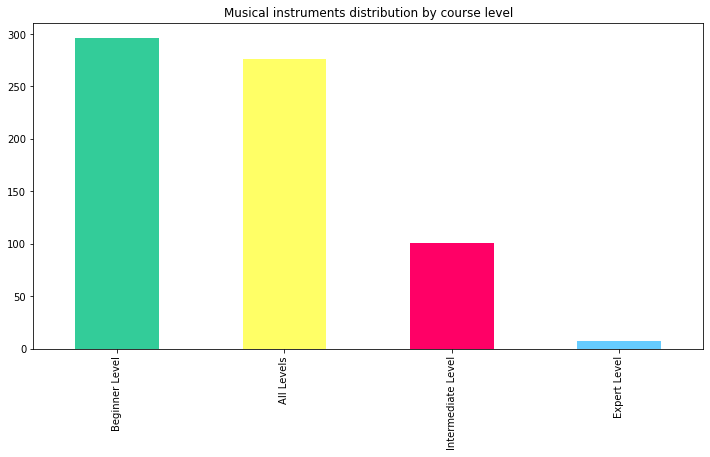

In [23]:
music_instruments = data[data['subject'] == 'Musical Instruments']
music_frequency = music_instruments['level'].value_counts()
music_frequency.plot.bar(color=['#33CC99','#FFFF66','#FF0066','#66CCFF'], figsize=(12, 6))
#figure placement
plt.title("Musical instruments distribution by course level")